# Import Packages

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import ast
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from jcopml.plot import plot_confusion_matrix
from sklearn.metrics import classification_report

# Load Preprocessed Dataset

In [19]:
df = pd.read_csv("data_prep.csv", usecols=['stemmed','sentimen'], encoding='latin-1')
df

,stemmed,sentimen
0,"['jangkau', 'hubung', 'kavling', 'tanah', 'jua...",Netral
1,"['akwowakoawkaow', 'kos', 'gawe', 'jakarta', '...",Netral
2,"['damage', 'parah', 'banget', 'nder', 'take', ...",Netral
3,"['goodbener', 'ajak', 'warga', 'dki', 'jakarta...",Netral
4,"['delapan', 'dukung', 'anies', 'butuh', 'jakar...",Netral
...,...,...
95,"['saking', 'otak', 'gagas', 'ngibul', 'ngarang...",Netral
96,"['cari', 'tanah', 'kavling', 'bangun', 'kebun'...",Netral
97,"['march', 'jakarta', 'indonesia', 'tickets', '...",Netral
98,"['kenneth', 'perintah', 'pusat', 'coba', 'jali...",Netral


# Data Preparation

## Encoding Categorical Values

In [20]:
le = preprocessing.LabelEncoder()
df['sentimen']=le.fit_transform(df['sentimen'])

## Combining Fractions of Words into One Sentence

In [21]:
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df['stemmed'] = df['stemmed'].apply(join_text_list)
df

,stemmed,sentimen
0,jangkau hubung kavling tanah jual murah kavlin...,1
1,akwowakoawkaow kos gawe jakarta wae,1
2,damage parah banget nder take all potong harga...,1
3,goodbener ajak warga dki jakarta gapai berkah ...,1
4,delapan dukung anies butuh jakarta perintah pusat,1
...,...,...
95,saking otak gagas ngibul ngarang cerita muka t...,1
96,cari tanah kavling bangun kebun buah jangkau h...,1
97,march jakarta indonesia tickets info,1
98,kenneth perintah pusat coba jalin komunikasi k...,1


## Pembobotan TF-IDF

In [22]:
max_features = 200

# calc TF vector
count = CountVectorizer(max_features=max_features)
TF_vector = count.fit_transform(df['stemmed'])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(df['stemmed'])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()
df['stemmed'] = tfidf_mat
df

,stemmed,sentimen
0,0.000000,1
1,0.000000,1
2,0.000000,1
3,0.643794,1
4,0.000000,1
...,...,...
95,0.000000,1
96,0.000000,1
97,0.000000,1
98,0.000000,1


# Data Splitting 

Mari kita pisahkan kumpulan data menjadi kumpulan pelatihan dan pengujian, yang akan dipilih secara acak semu untuk membuat pemisahan 80-20%. Kita akan menggunakan set pelatihan untuk melatih model dan melakukan beberapa pengoptimalan. Kita akan menggunakan set pengujian, yang akan bertindak sebagai data yang tidak terlihat, untuk menilai kinerja model.

Saat menggunakan metode ini untuk pembelajaran mesin, selalu berhati-hatilah dalam menggunakan set pengujian untuk membuat model. Kebocoran data adalah masalah umum yang dapat mengakibatkan overfitting.

In [23]:
#Mendefinisikan x and y
X = df.drop(['sentimen'],axis=1)
y = df['sentimen']

# pembagian data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

# Pemodelan K-Nearest Neighbor (KNN)

Pemodelan KNN dimulai dengan setting jumlah tetangga dan metrics yang digunakan. Berikut adalah parameter yang akan kita atur dalam pemodelan ini:

euclide model : Model Square Euclidean dengan menggunakan parameter metric = distance.sqeuclidean

manhattan model : Model Manhattan dengan menggunakan parameter metric = distance.cityblock

Prinsip kerja K-Nearest Neighbor (KNN) adalah mencari jarak terdekat antara data yang akan dievaluasi dengan K-Nearest Neighbor terdekatnya dalam data pelatihan.

## Euclidean Model

In [24]:
euclidean_model = KNeighborsClassifier(n_neighbors=2, metric=distance.sqeuclidean) 
euclidean_model.fit(X_train,y_train)

KNeighborsClassifier(metric=<function sqeuclidean at 0x000001A77FB7C1F0>,
                     n_neighbors=2)

## Manhattan Model

In [25]:
manhattan_model = KNeighborsClassifier(n_neighbors=2, metric=distance.cityblock)
manhattan_model.fit(X_train, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x000001A77FB7C5E0>,
                     n_neighbors=2)

# Evaluasi Model KNN

## Evaluasi Euclidean Model

C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature nam

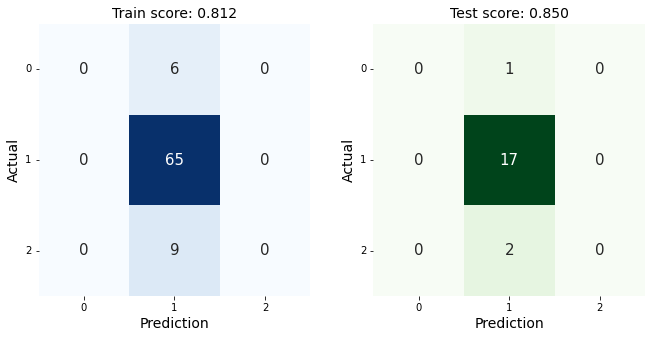

In [26]:
y_pred_euclidean = euclidean_model.predict(X_test)

# Melihat evaluasi model menggunakan confusion matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, euclidean_model)

In [27]:
# Melihat hasil klasifikasi
print(classification_report(y_test, y_pred_euclidean))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.85      1.00      0.92        17
           2       0.00      0.00      0.00         2

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20



C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluasi Manhattan Model

C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature nam

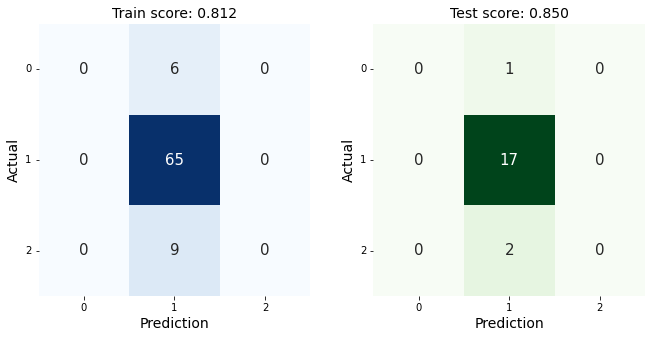

In [28]:
y_pred_manhattan = manhattan_model.predict(X_test)

# Melihat evaluasi model menggunakan confusion matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, manhattan_model)

In [29]:
# Melihat hasil klasifikasi
print(classification_report(y_test, y_pred_manhattan))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.85      1.00      0.92        17
           2       0.00      0.00      0.00         2

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20



C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taqiy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
